In [1]:
#import all modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

import tensorflow as tf
import cv2
import glob
from tqdm import tqdm
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation
from tensorflow.keras.layers import Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [2]:
import os
Dirname = []
Filenames =[]
for dirname, _, filenames in os.walk('C:/Users/rejee/OneDrive/Desktop/ml_assign'):
    for filename in filenames:
        Dirname.append(dirname)
        Filenames.append(filename)
        X = os.path.join(dirname, filename)
print(Filenames)        
        #print(os.path.join(dirname, filename))
        

['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssksksss135.xml', 'maksssksksss136.xml', 'maksssksksss137.x

In [3]:
Dir = 'C:\\Users\\rejee\\OneDrive\\Desktop\\ml_assign\\Facemask'
print(os.listdir(Dir))
images_path = os.path.join(Dir,'images')
print("Image path = {}".format(images_path))
print("Total number of images : {}".format(len(os.listdir(images_path))))
Annotation_path = 'C:\\Users\\rejee\\OneDrive\\Desktop\\ml_assign\\Facemask\\annotations'
print("Annotation path = {}".format(Annotation_path))
print("Total Annotation files are {}".format(len(os.listdir(Annotation_path))))

['annotations', 'images']
Image path = C:\Users\rejee\OneDrive\Desktop\ml_assign\Facemask\images
Total number of images : 853
Annotation path = C:\Users\rejee\OneDrive\Desktop\ml_assign\Facemask\annotations
Total Annotation files are 853


In [4]:
Image_width = 80
Image_height = 80
Image_array = []
Labels = []


In [5]:
Sorted_files = sorted(os.listdir(Annotation_path))
print(Sorted_files)
Sorted_images_path = sorted(os.listdir(images_path))
print(Sorted_images_path)

['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssksksss135.xml', 'maksssksksss136.xml', 'maksssksksss137.x

In [6]:
def get_box(obj):
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]


for file in tqdm(sorted(os.listdir(Annotation_path)),desc='Preparing data..'):
    file_path = Annotation_path + "/" + file
    xml = ET.parse(file_path)
    root = xml.getroot()
    image_path = images_path + "/" + root[1].text

     
    for bndbox in root.iter('bndbox'):
        [xmin, ymin, xmax, ymax] = get_box(bndbox)
        img = cv2.imread(image_path)
        face_img = img[ymin:ymax,xmin:xmax]
        face_img  = cv2.resize(face_img,(Image_width,Image_height))
        Image_array.append(np.array(face_img)) 
    
    for obj in root.findall('object'):
        name = obj.find('name').text 
        Labels.append(np.array(name))

Preparing data..: 100%|██████████| 853/853 [00:55<00:00, 15.36it/s]


In [7]:
num_classes = 3
X = np.array(Image_array)
X = X/255

le = LabelEncoder()
y = le.fit_transform(Labels)
y  = to_categorical(y,num_classes)

In [8]:
print(X.shape)
print(y.shape)

(4072, 80, 80, 3)
(4072, 3)


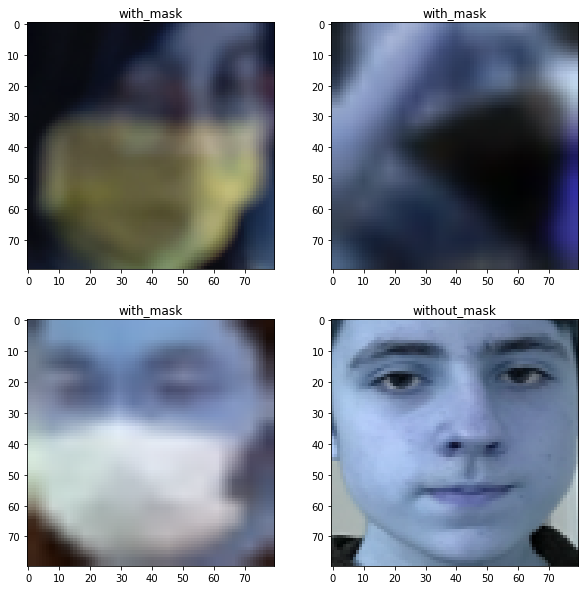

In [9]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range(2):
        l = rn.randint(0,len(Labels))
        ax[i,j].imshow(Image_array[l])
        ax[i,j].set_title(Labels[l])

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [11]:
print(X_train.shape)
print(y_train.shape)

(3257, 80, 80, 3)
(3257, 3)


In [12]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (Image_width,Image_height,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 96,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(3,activation = "softmax"))


Batch_size = 64
Epochs = 20
seed = 1000

In [13]:
train_datagen = ImageDataGenerator(
                    rotation_range = 10,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest')

In [15]:
Estop = EarlyStopping(monitor = 'val_loss',patience = 2,verbose = 1,min_delta = 0.01)

In [16]:
model.compile(optimizer = Adam(lr = 0.001),loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = Batch_size),steps_per_epoch = X_train.shape[0]//Batch_size,epochs = Epochs,validation_data = (X_val,y_val),verbose=1,callbacks=[Estop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       110720    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

C:\Users\rejee\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\rejee\AppData\Local\Temp/ipykernel_21644/3407064129.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size = Batch_size),steps_per_epoch = X_train.shape[0]//Batch_size,epochs = Epochs,validation_data = (X_val,y_val),verbose=1,callbacks=[Estop])


Epoch 1/20
50/50 [==============================] - 75s 1s/step - loss: 0.4942 - accuracy: 0.8274 - val_loss: 0.2351 - val_accuracy: 0.9288
Epoch 2/20
50/50 [==============================] - 65s 1s/step - loss: 0.2856 - accuracy: 0.9164 - val_loss: 0.2165 - val_accuracy: 0.9337
Epoch 3/20
50/50 [==============================] - 64s 1s/step - loss: 0.2666 - accuracy: 0.9179 - val_loss: 0.2221 - val_accuracy: 0.9301
Epoch 4/20
50/50 [==============================] - 64s 1s/step - loss: 0.2587 - accuracy: 0.9195 - val_loss: 0.2053 - val_accuracy: 0.9301
Epoch 5/20
50/50 [==============================] - 65s 1s/step - loss: 0.2382 - accuracy: 0.9289 - val_loss: 0.1921 - val_accuracy: 0.9387
Epoch 6/20
50/50 [==============================] - 65s 1s/step - loss: 0.2670 - accuracy: 0.9120 - val_loss: 0.1959 - val_accuracy: 0.9411
Epoch 7/20
50/50 [==============================] - 49s 967ms/step - loss: 0.2407 - accuracy: 0.9280 - val_loss: 0.2062 - val_accuracy: 0.9399
Epoch 7: early st

In [19]:
def plot_model_performance(history):
    fig =plt.figure(figsize = (20,20))
    #plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.show()
    

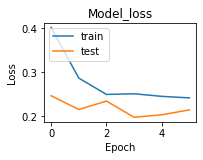

In [20]:
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'],loc ="upper left")
    plt.show()

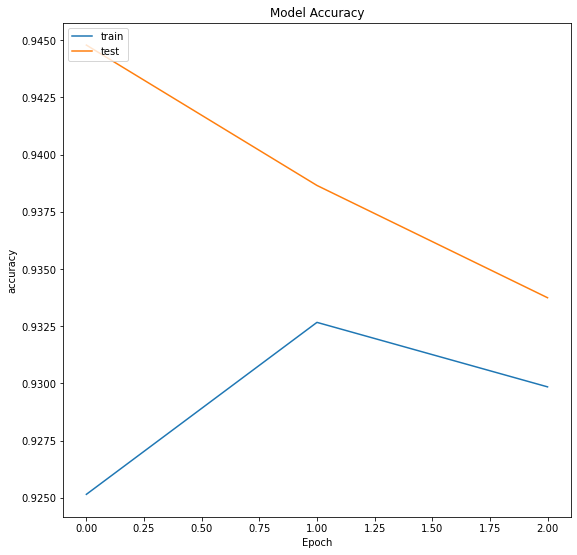

In [23]:
plot_model_performance(history)